In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# load the dataset
X = np.load('data/X.npy')
y = np.load('data/y.npy')
X = X[0:1000]
y = y[0:1000]

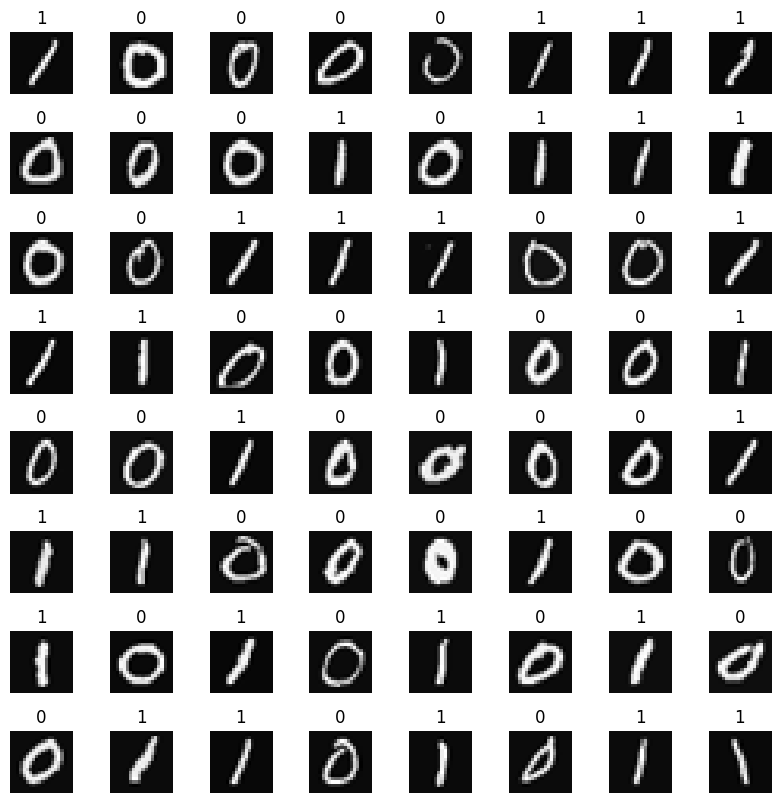

In [3]:
# visualizing the data
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [4]:
# construct the model
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='sigmoid'),
        Dense(units=15, activation='sigmoid'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# compile and fit the model on the dataset
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7598   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.5201
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3671 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2534 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.1860
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.1415
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1112 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0940 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0764 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0736 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0572 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0524 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0487 
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0355 


In [7]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
 predicting a zero: [[0.01192692]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 predicting a one:  [[0.9697266]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━

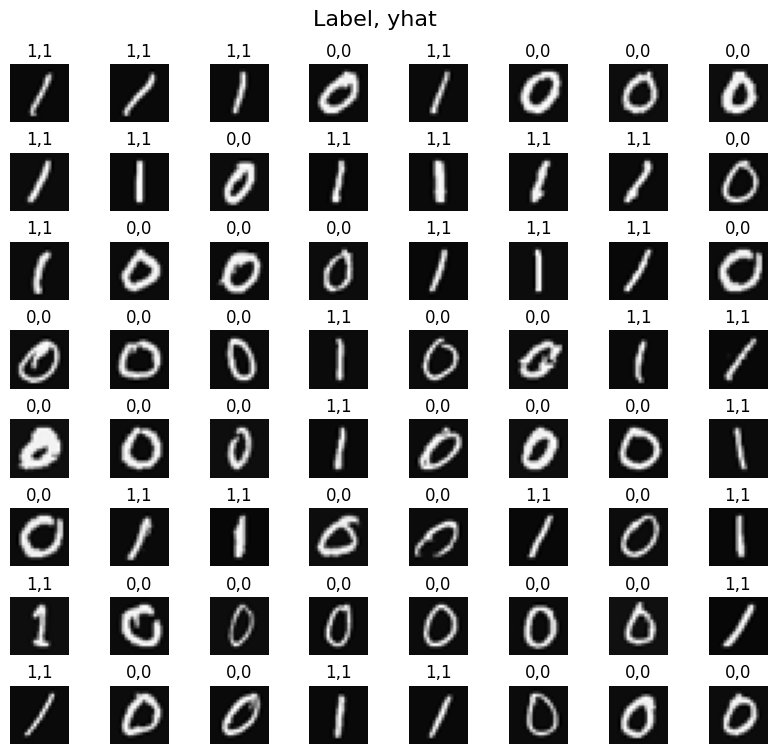

In [8]:
# compare the prediction with labels
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()